In [1]:
import pandas as pd
import numpy as np

# Create a mock dataset
data = {
    'length': np.random.randint(5, 50, 1000),  # Joke length in words
    'puns': np.random.randint(0, 5, 1000),    # Number of puns
    'complexity': np.random.randint(1, 10, 1000),  # Complexity score
    'funny': np.random.choice([0, 1], 1000)   # 1: Funny, 0: Not funny
}

df = pd.DataFrame(data)

# Save the dataset (optional)
df.to_csv('jokes_dataset.csv', index=False)
print(df.head())


   length  puns  complexity  funny
0       7     4           9      0
1      16     2           1      1
2      14     1           9      0
3      32     2           7      1
4      30     2           8      1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split dataset into features (X) and labels (y)
X = df[['length', 'puns', 'complexity']]
y = df['funny']

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(8, activation='relu'),  # Hidden layer 1
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5217 - loss: 0.7609 - val_accuracy: 0.5050 - val_loss: 0.7280
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5157 - loss: 0.7126 - val_accuracy: 0.5150 - val_loss: 0.7107
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5207 - loss: 0.7030 - val_accuracy: 0.5350 - val_loss: 0.7014
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5553 - loss: 0.6830 - val_accuracy: 0.5500 - val_loss: 0.6990
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4803 - loss: 0.6974 - val_accuracy: 0.5000 - val_loss: 0.6966
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5389 - loss: 0.6890 - val_accuracy: 0.5400 - val_loss: 0.6960
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5383 - loss: 0.6891 - val_accuracy: 0.5200 - val_loss: 0.6953
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5204 - loss: 0.6905 - val_accuracy: 0.5300 - val_loss

In [5]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5406 - loss: 0.6871 
Test Accuracy: 50.00%


In [6]:
# Example new joke features: length=20, puns=2, complexity=5
new_joke = np.array([[20, 2, 5]])
new_joke = scaler.transform(new_joke)  # Scale the features

prediction = model.predict(new_joke)
print("Funny!" if prediction > 0.5 else "Not funny!")

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Not funny!


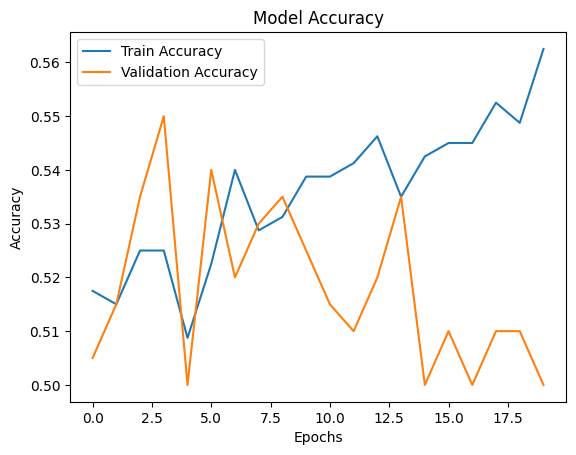

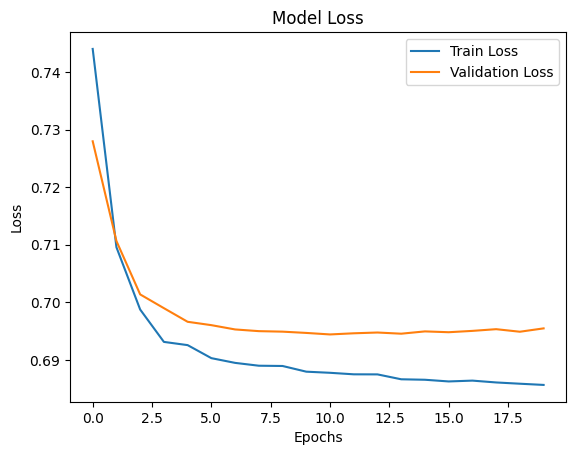

In [7]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [8]:
from sklearn.utils import resample

# Separate classes
df_funny = df[df['funny'] == 1]
df_not_funny = df[df['funny'] == 0]

# Resample minority class
df_minority_resampled = resample(
    df_not_funny if len(df_funny) > len(df_not_funny) else df_funny,
    replace=True,
    n_samples=max(len(df_funny), len(df_not_funny)),
    random_state=42
)

# Combine balanced data
df = pd.concat([df_funny, df_minority_resampled])

In [14]:
print(df.columns)

Index(['length', 'puns', 'complexity', 'funny'], dtype='object')


In [15]:
df.rename(columns={'actual_column_name': 'joke_text'}, inplace=True)

In [16]:
df['sentiment'] = df['actual_column_name'].apply(lambda x: TextBlob(x).sentiment.polarity)

KeyError: 'actual_column_name'

In [10]:
from textblob import TextBlob

df['sentiment'] = df['joke_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

KeyError: 'joke_text'